![dataset-cover.png](img/dataset-cover.png)

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**Présentation**: Cet ensemble de données recueille des informations sur **110.527** rendez-vous médicaux et **14** variables associées au Brésil et se concentre sur la question de savoir si les patients se présentent ou non à leur rendez-vous. Un certain nombre de caractéristiques concernant le patient sont incluses dans chaque ligne. 
[source](https://www.kaggle.com/code/mostafarefaatm/medical-appointment-no-show).

>**Dictionnaire de données** :<br>
*`01 - PatientId`* : Identifiant du patient <br>
*`02 - AppointmentID`* : Identifiant de chaque rendez-vous <br>
*`03 - Gender`* : Male ou Femele . La femme est la plus grande proportion, la femme prend beaucoup plus soin de sa santé que l'homme.<br>
*`04 - DataMarcacaoConsulta`* : Le jour du rendez-vous, où ils doivent se rendre chez le médecin.<br>
*`05 - DataAgendamento`* : Le jour où quelqu'un a appelé ou enregistré le rendez-vous, c'est avant le rendez-vous bien sûr.<br>
*`06 - Age`* : Quel âge a le patient.<br>
*`07 - Neighbourhood`* : Où le rendez-vous a lieu.<br>
*`08 - Scholarship`* : True ou False. Observation, c'est un vaste sujet, pensez à lire cet [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).<br>
*`09 - Hipertension`* : True ou False.<br>
*`10 - Diabetes`* : True ou False. <br>
*`11 - Alcoholism`* : True ou False. <br>
*`12 - Handcap`* : (Bonnet) True ou False. <br>
*`13 - SMS_reçu`* : SMS reçu 1 ou plusieurs messages envoyés au patient. <br>
*`14 - No-show`* : (Non-présentation) True ou False.


### Question(s) for Analysis
>**Q1**: Une personne prend rendez-vous chez le médecin, reçoit toutes les instructions et ne se présente pas. Qui blâmer ?

> **Q2**: Quels facteurs tenir en compte pour éviter celà pour les prochains patients ? 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime as dt
%matplotlib inline

In [56]:
df = pd.read_csv('datasets/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
print("Ce jeu de données compte {} lignes et {} colonnes comme énoncé plus tôt !".format(df.shape[0],df.shape[1]))

Ce jeu de données compte 110527 lignes et 14 colonnes comme énoncé plus tôt !


In [58]:
# Découverte des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [59]:
# Description du jeux de données
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [60]:
# Recherche de vameurs manquantes
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*Ce jeu de onnées ne compte pas de données manquantes, une aubaine en analyse de données !*

In [61]:
df.duplicated().sum()

0

*Pas d'enregistrement dupliqué aussi !*

**Conclusion Partielle de l'étape**
> * Les Patients ont des ages compris entre -1(valeur abérente) et 115 avec une moyenne de 37 ans, donc relativement assez jeunes ! <br>
> * 32 % des patients ont reçu un sms
> * 7.18 % d'entre eux sont diabétiques
> * 19.7 % sont hypertendus
> * 3 % sont alcholiques et 2.22 % portent des bonnets


### Data Cleaning
> **Objecif de l'étape**: Après la découverte de notre jeu de données et les intuitions développées pour résoudre notre porblématique, nous allons procéder ainsi pour préparer nos données à l'exploration : 
>* Selectionner les données nécessaires à notre études
>* Définir en minuscule tous nos noms de colonnes et les corriger
>* Formatage de la date (possible recherche de feature)
>* Recherche de valeurs abérentes ou absurdes et les corriger ou supprimer

##### Selectionner des colonnes revient à supprimer certains

Nous allons supprimer ceux si car elles sont spécifiques à chaque personne, donc ne nous renseigne rien sur l'ensemble du dataset

In [62]:
df.drop(['AppointmentID','PatientId'], axis=1, inplace=True)

In [63]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*La variable `age`a au moins une valeur abérente ( **min(age)=1** ), ce qui peut biaiser nos statistiques descriptives. On va donc aussi la supprimer*

In [64]:
abber=df[df['Age'] < 0].index

In [65]:
df.drop(abber, inplace=True)

##### Mettre tous les colonnes en minisculce pour faciliter leur appel

In [66]:
df.columns = df.columns.str.lower()

In [67]:
df.shape

(110526, 12)

##### Modifier les noms des colonnes

Tout à l'heure la colonne *`handcap`* a été traduite en bonnet en français, mais en réalité les collecteurs voulait écrire *`handicap`* qui signifie handicape, sinon cela n'aurait aucun sens. Nous allons par la suite convertir tous les noms de colonnes en français pour faciliter notre appréension des données. Et enplus reformuler certains à l'aide du dictionnaire de données.

In [68]:
dict_rename = {'neighbourhood' : 'quartier','scholarship':'bourse','sms_received':'sms_reçu','alcoholism' :'alcoolique','no-show':'absent',
              'hipertension':'hypertendu','handcap':'handicapé','gender':'genre','diabetes':'diabetique','scheduledday':'date_prévue','appointmentday':'date_rv'}

df1 = df.rename(dict_rename, axis='columns')

In [69]:
df1.head(2)

,genre,date_prévue,date_rv,age,quartier,bourse,hypertendu,diabetique,alcoolique,handicapé,sms_reçu,absent
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


**feature engineering**

*Puisque nous avons des colonnes de dates, cela est une excellente opportunité pour créer de nouvelles colonnes. Pour cela on va créer des **fonctions** qui vont se charger de cela !*

In [70]:
# Convertir au format Y-m-d-H-M-S
def parse_date(date):
    if date == '':
        return None
    else:
        return (dt.strptime(date, "%Y-%m-%dT%H:%M:%S%fz"))
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
# Obtenir l'heure de la date
def get_hour(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split(' ')[1].split(':')[0])
    
# Obtenir le jour de la date    
def get_day(date):
    if date == '':
        return None
    else:
        return parse_date(date).strftime('%A')

# Obtenir le mois de la date
def get_month(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[1])

# Obtenir l'année de la date
def get_year(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[0])
    
df1['heure_prévue'] = df1['date_prévue'].apply(lambda x: get_hour(x))
df1['jour_prévue'] = df1['date_prévue'].apply(lambda x: get_day(x))
df1['mois_prévue'] = df1['date_prévue'].apply(lambda x: get_month(x))
df1['an_prévu'] = df1['date_prévue'].apply(lambda x: get_year(x))
df1['jour_rv'] = df1['date_rv'].apply(lambda x: get_day(x))
df1['mois_rv'] = df1['date_rv'].apply(lambda x: get_month(x))
df1['an_rv'] = df1['date_rv'].apply(lambda x: get_year(x))

In [71]:
df1

,genre,date_prévue,date_rv,age,quartier,bourse,hypertendu,diabetique,alcoolique,handicapé,sms_reçu,absent,heure_prévue,jour_prévue,mois_prévue,an_prévu,jour_rv,mois_rv,an_rv
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,4,2016,Friday,4,2016
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,4,2016,Friday,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,9,Tuesday,5,2016,Tuesday,6,2016
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,7,Tuesday,5,2016,Tuesday,6,2016
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,16,Wednesday,4,2016,Tuesday,6,2016
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,15,Wednesday,4,2016,Tuesday,6,2016


*Comme vous le voyez maintenant, nous avons **19 colonnes**, donc plus de possibilités d'exploration !*

*Nous supprimons donc nos deux colonnes `date_prévu` et `date_rv`, qui ne servent plus à rien pour la suite !*

In [72]:
df1.drop(['date_prévue', 'date_rv'], axis=1, inplace=True)

In [73]:
df1.head(2)

,genre,age,quartier,bourse,hypertendu,diabetique,alcoolique,handicapé,sms_reçu,absent,heure_prévue,jour_prévue,mois_prévue,an_prévu,jour_rv,mois_rv,an_rv
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4,2016,Friday,4,2016


*En ce qui concerne la variable cible `absent`, en projet de data science ou d'analyse de données, il est plus facile d'apréhender le nomenclature avec la valeur True(yes) qu'avec la valeur False(no). Donc nous allons transformer cette colonne en présence plutôt qu'en absence.*

In [74]:
df1['présent'] = df1['absent'].apply(lambda x: 1 if x=='No' else 0 )

In [75]:
df1.head(1)

,genre,age,quartier,bourse,hypertendu,diabetique,alcoolique,handicapé,sms_reçu,absent,heure_prévue,jour_prévue,mois_prévue,an_prévu,jour_rv,mois_rv,an_rv,présent
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,2016,Friday,4,2016,1


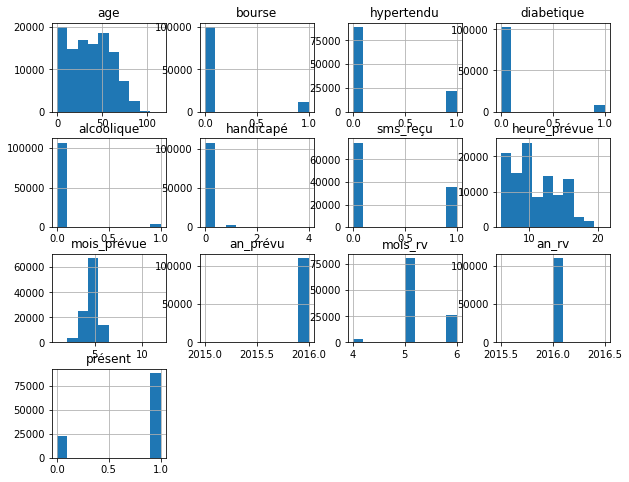

In [76]:
df1.hist(figsize=(10, 8));

In [77]:
df1.describe()

,age,bourse,hypertendu,diabetique,alcoolique,handicapé,sms_reçu,heure_prévue,mois_prévue,an_prévu,mois_rv,an_rv,présent
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.774542,4.823860,2015.999439,5.210041,2016.0,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,3.216192,0.715795,0.023678,0.473776,0.0,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,2015.000000,4.000000,2016.0,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2016.000000,5.000000,2016.0,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000,2016.000000,5.000000,2016.0,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,5.000000,2016.000000,5.000000,2016.0,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,12.000000,2016.000000,6.000000,2016.0,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


#### Question de recherche (QR) 1 : Quel est la proportion de personnes présentes/absentes aux rendez-vous ? 

In [78]:
presents = df1['présent'] == True
absents = df1['présent'] == False
print("Pourcentage de présence : {:.2f} %".format(presents.mean()*100))
print("Pourcentage d'absence : {:.2f} %".format(absents.mean()*100))

Pourcentage de présence : 79.81 %
Pourcentage d'absence : 20.19 %


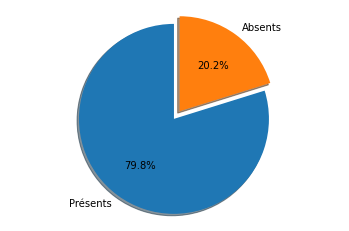

In [79]:
labels = 'Présents', 'Absents'
sizes = [presents.mean()*100, absents.mean()*100]
explode = (0, 0.1)  # Portion à isoler

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

*On pourra dire que prés de **80%** des patients viennent aux RV et naturellement près de **20%** désistent.*

##### QR 2 : Qui vont le plus souvent chez le médecin, les hommes ou les femmes ?

*Ici on va filtrer l'ensemble de données par sexe (M ou F) et compter les valeurs de présences et d'absences.*

In [80]:
df1.groupby('genre').présent.value_counts()

genre  présent
F      1          57245
       0          14594
M      1          30962
       0           7725
Name: présent, dtype: int64

*On va regrouper en par sexe et par présence pour calculer le pourcentage de présence par pour chaque sexe.*

In [81]:
df1.groupby('genre')['présent'].mean()

genre
F    0.796851
M    0.800321
Name: présent, dtype: float64

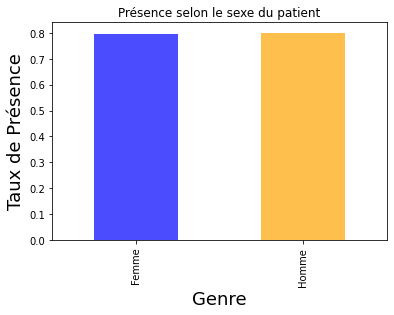

In [82]:
# Graphique à barres des taux avec une barre pour les femmes (F) et une barre pour les hommes (M).

df1.groupby('genre')['présent'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Femme', 'Homme'])
plt.ylabel('Taux de Présence', fontsize=18)
plt.xlabel('Genre', fontsize=18)
plt.title('Présence selon le sexe du patient');

*On peut dire que les hommes et les femmes ont tous à peu prés les même habitudes avec près de **80 %** de présence combiné.*

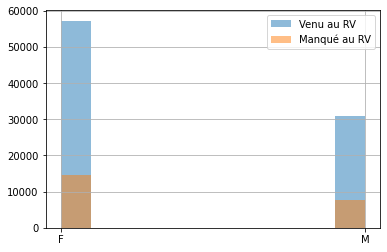

In [83]:
df1.genre[presents].hist(alpha=0.5, label = 'Venu au RV')
df1.genre[absents].hist(alpha=0.5, label = 'Manqué au RV');
plt.legend();

##### QR 3:  Quelle est la maladie qui survient le plus chez les patients lors des  rendez-vous ?

In [84]:
hyper_prop = df1.hypertendu.mean()*100
print("La proportion d'hypertendus est de : {:.2f} %".format(hyper_prop))

La proportion d'hypertendus est de : 19.72 %


In [85]:
diabetes_prop = df1.diabetique.mean()*100
print("La proportion de diabétiques est de : {:.2f} %".format(diabetes_prop))

La proportion de diabétiques est de : 7.19 %


In [86]:
diabetes_prop = df.diabetes.mean()*100
print("La proportion de diabétiques est de : {:.2f} %".format(diabetes_prop))

La proportion de diabétiques est de : 7.19 %


In [87]:
alcoolique_prop = df1.alcoolique.mean()*100
print("La proportion d'alcoolique est de : {:.2f} %".format(alcoolique_prop))

La proportion d'alcoolique est de : 3.04 %


In [88]:
handicap_prop = df1.handicapé.mean()*100
print("La proportion de handicapés est de : {:.2f} %".format(handicap_prop))

La proportion de handicapés est de : 2.22 %


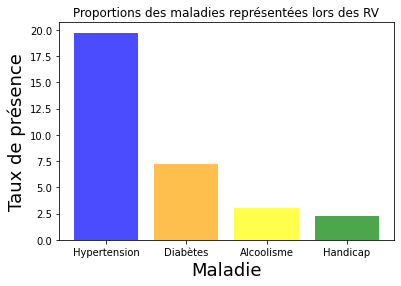

In [89]:
colors = ['blue', 'orange', 'yellow', 'green']
locations = [1, 2, 3, 4]
heights = [hyper_prop, diabetes_prop, alcoolique_prop, handicap_prop]
labels = ['Hypertension', 'Diabètes', 'Alcoolisme', 'Handicap']

plt.bar(locations,heights,color=colors, alpha=0.7);
plt.title('Proportions des maladies représentées lors des RV')
plt.xlabel('Maladie', fontsize=18)
plt.ylabel("Taux de présence", fontsize=18)
plt.xticks(locations, labels);

*On peut nettement voir que l'**hypertension** est la maladie la plus fréquente chez les patients qui viennent aux RV !🤔 Intéressant !* 

#### QR 4 : Quels âges sont les plus touchés par ces maladies (hypertension, diabète, alcoolisme, handicap) ?

*Pour chaque maladie on créera on confrontera cette dernière à la variale `age`.*

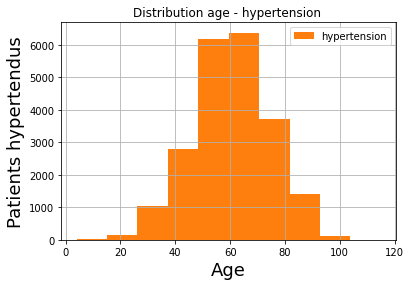

In [90]:
# Graphe distribution age des hypeterendus

df1.age[df1.hypertendu == 1].hist(bins = 10, label = 'hypertension' ,color='tab:orange');
plt.title('Distribution age - hypertension ')
plt.xlabel('Age', fontsize=18);
plt.ylabel('Patients hypertendus', fontsize=18);
plt.legend();

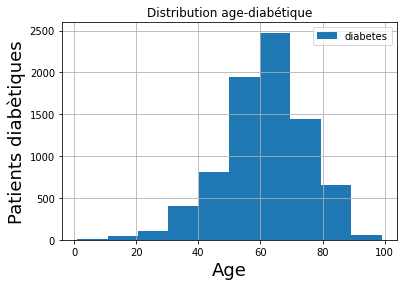

In [91]:
# Graphe distribution age des diabètiques

df1.age[df1.diabetique == 1].hist(bins = 10, label = 'diabetes' );
plt.title('Distribution age-diabétique')
plt.xlabel('Age', fontsize=18);
plt.ylabel('Patients diabètiques', fontsize=18);
plt.legend();

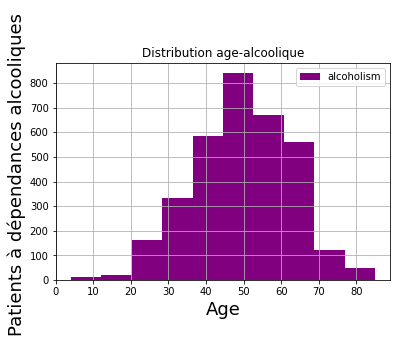

In [92]:
# Graphe distribution des ages des patients à dépendances alcooliques

df1.age[df1.alcoolique == 1].hist(bins = 10, label = 'alcoholism', color='purple');
plt.title('Distribution age-alcoolique')
plt.xlabel('Age', fontsize=18);
plt.ylabel('Patients à dépendances alcooliques ', fontsize=18);
plt.legend();

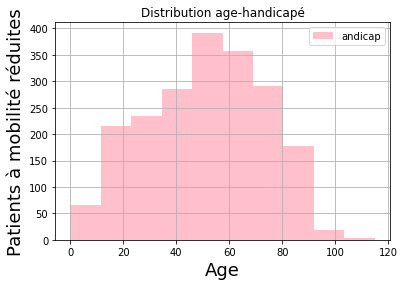

In [93]:
# Graphe distribution des ages des patients à mobilité réduites

df1.age[df1.handicapé == 1].hist(bins = 10, label = 'andicap', color='pink');
plt.title('Distribution age-handicapé')
plt.xlabel('Age', fontsize=18);
plt.ylabel('Patients à mobilité réduites', fontsize=18);
plt.legend();

*On conclut que les ages compris entre **40 et 80 ans** sont les plus touchés par les pathélogies.*

#### QR 5 : Cependant, la maladie a t-elle un impact sur le taux de présence aux rendez-vous ?

hypertendu
0    0.790961
1    0.826980
Name: présent, dtype: float64
----------------------------------------------------


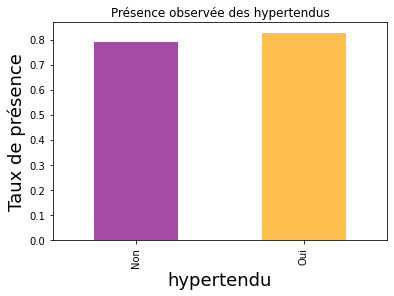

diabetique
0    0.796370
1    0.819967
Name: présent, dtype: float64
----------------------------------------------------


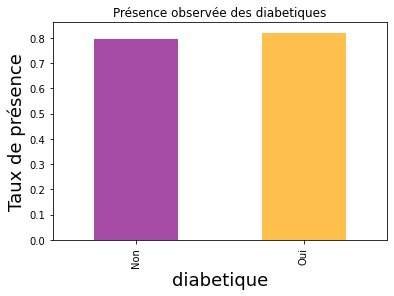

handicapé
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: présent, dtype: float64
----------------------------------------------------


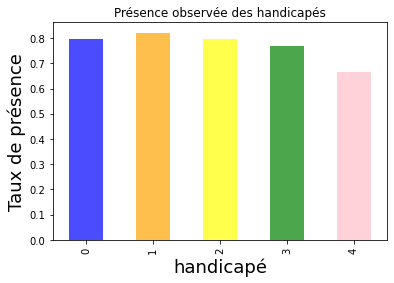

alcoolique
0    0.798052
1    0.798512
Name: présent, dtype: float64
----------------------------------------------------


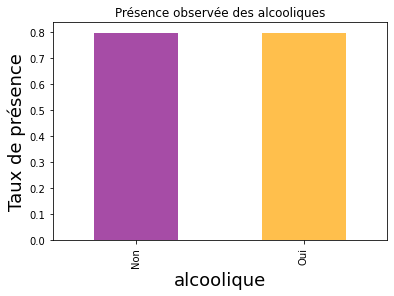

In [94]:
maladies = ['hypertendu','diabetique','handicapé', 'alcoolique']

for maladie in maladies : 
    color1 = ['purple', 'orange']
    color2= ['blue', 'orange', 'yellow', 'green', 'pink']
    label = ['Non','Oui']
    title = [0,1]
    
    print(df1.groupby(maladie)['présent'].mean())
    print('----------------------------------------------------')
    if maladie == 'handicapé' :
        color1,label,title=color2,[0,1,2,3,4],[0,1,2,3,4]
    df1.groupby(maladie)['présent'].mean().plot(kind='bar', alpha=.7, color=color1);

    # title and labels
    plt.xticks(title, label)
    plt.title('Présence observée des {}s'.format(maladie));
    plt.ylabel('Taux de présence', fontsize=18)
    plt.xlabel(maladie, fontsize=18);
    plt.show()

*Apparement cette approche n'est pas assez pointu car on ne sent pas une très grande différence entre les différentes modalités de nos variables pathologiques !* 😂

#### QR 6 : Maintenant, comment se comportent ces pathologies en fonction du sexe  ?

genre
F    0.213519
M    0.167033
Name: hypertendu, dtype: float64
----------------------------------------------------


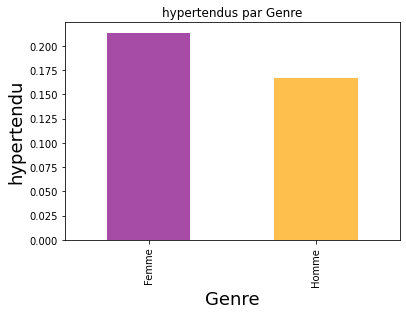

genre
F    0.078036
M    0.060408
Name: diabetique, dtype: float64
----------------------------------------------------


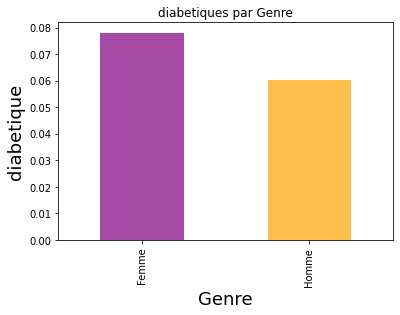

genre
F    0.019544
M    0.027270
Name: handicapé, dtype: float64
----------------------------------------------------


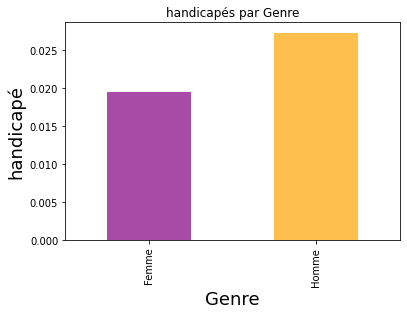

genre
F    0.017024
M    0.055238
Name: alcoolique, dtype: float64
----------------------------------------------------


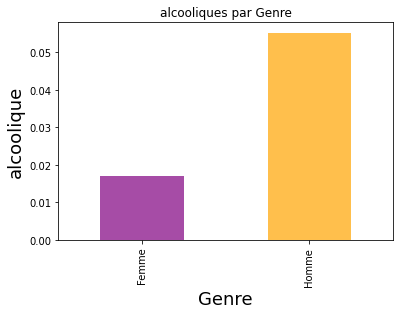

In [95]:
maladies = ['hypertendu','diabetique','handicapé', 'alcoolique']

for maladie in maladies : 
    color1 = ['purple', 'orange']
    color2= ['blue', 'orange', 'yellow', 'green', 'pink']
    label = ['Femme','Homme']
    title = [0,1]
    
    print(df1.groupby('genre')[maladie].mean())
    print('----------------------------------------------------')
    
    df1.groupby('genre')[maladie].mean().plot(kind='bar', alpha=.7, color=color1);

    # title and labels
    plt.xticks(title, label)
    plt.title('{}s par Genre'.format(maladie));
    plt.ylabel(maladie, fontsize=18)
    plt.xlabel('Genre', fontsize=18);
    plt.show()



<hr>

#### QR 7 : La bourse pourrait-elle être le facteur déterminant à la présence des patients aux RV ?

In [96]:
df1.bourse.value_counts()

0    99665
1    10861
Name: bourse, dtype: int64

In [97]:
boursier_prop = df1.bourse.value_counts()[1] / df1.shape[0]
print("Le pourcentage de patients couverts par la bourse est de : {:.2f} %".format(boursier_prop))

Le pourcentage de patients couverts par la bourse est de : 0.10 %


In [98]:
nboursier_prop = df1.bourse.value_counts()[0] / df1.shape[0]
print("Le pourcentage de patients non boursiers est de : {:.2f} %".format(nboursier_prop))

Le pourcentage de patients non boursiers est de : 0.90 %


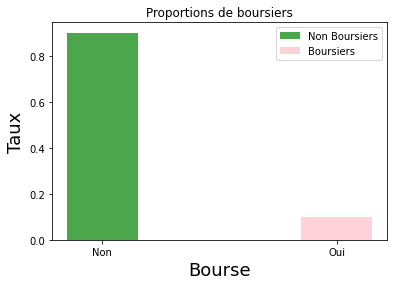

In [99]:
nboursier_plot = plt.bar(0, nboursier_prop, width=.3, alpha=0.7, color ='green', label='Non Boursiers' )
boursier_plot = plt.bar(1, boursier_prop, width=.3, alpha=0.7, color='pink', label='Boursiers')

# title and labels
plt.xticks([0, 1], ['Non', 'Oui'])
plt.xlabel('Bourse', fontsize=18)
plt.ylabel('Taux', fontsize=18)
plt.title('Proportions de boursiers');
plt.legend();

bourse
0    0.801926
1    0.762637
Name: présent, dtype: float64
-----------------------------------------------


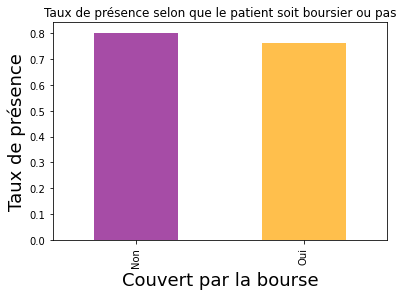

In [100]:
print(df1.groupby('bourse').présent.mean())
print('-----------------------------------------------')
df1.groupby('bourse').présent.mean().plot(kind='bar', alpha=.7, color=['purple', 'orange']);

# title and labels 775387491
plt.xticks([0, 1], ['Non', 'Oui'])
plt.title('Taux de présence selon que le patient soit boursier ou pas')
plt.xlabel('Couvert par la bourse', fontsize=18)
plt.ylabel('Taux de présence', fontsize=18);

*Les patients non boursiers sont plus favorables à la présence aux RV que les patients boursiers avec respectivement près **80.19 %** contre **76.26 %** chez les boursiers. Ce qui est considérable pour la suite.* 🤔

*Nous savons maintenant sue la bourse est un facteur à tenir en compte pour déterminer la présence ou non des patients. Nous allons donc vérifier sa corrélation avec la variable `age`.*

genre
F    0.123234
M    0.051904
Name: bourse, dtype: float64
--------------------------------------------


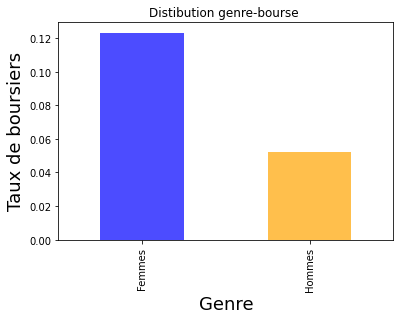

In [101]:
print(df1.groupby('genre').bourse.mean())
print('--------------------------------------------')
df1.groupby('genre').bourse.mean().plot(alpha=0.7, color = ['blue', 'orange'], kind='bar');

# title and labels
plt.xticks([0,1], ['Femmes', 'Hommes'])
plt.title('Distibution genre-bourse ')
plt.xlabel('Genre', fontsize=18);
plt.ylabel('Taux de boursiers', fontsize=18);

*Un écart net qui montre que le taux de boursier chez les femmes (**12 %**) sont plus nombreux que chez les hommes(**5 %**)*.😒
Un écart significatif égaleent dans la determination de la présence ou la présence (hétérogénéité).

*Nous allons procéder de la même manière, sur avec cette fois la variable `age`.*

In [102]:
# Obtenir les handicapés présents par genre
handi_count = df1.groupby(['genre', 'handicapé']).count()['présent']
handi_count

genre  handicapé
F      0            70549
       1             1181
       2              105
       3                3
       4                1
M      0            37736
       1              861
       2               78
       3               10
       4                2
Name: présent, dtype: int64

In [103]:
handi_total = df1.groupby('genre').count()['présent']
handi_total

genre
F    71839
M    38687
Name: présent, dtype: int64

In [104]:
h_handi_prop = handi_count['M'] / handi_total['M']
print('Hommes ')
print(h_handi_prop)
print('------------------------------------------------')
print('Femmes ')
f_handi_prop = handi_count['F'] / handi_total['F']
print(f_handi_prop,' Femmes')

Hommes 
handicapé
0    0.975418
1    0.022256
2    0.002016
3    0.000258
4    0.000052
Name: présent, dtype: float64
------------------------------------------------
Femmes 
handicapé
0    0.982043
1    0.016440
2    0.001462
3    0.000042
4    0.000014
Name: présent, dtype: float64  Femmes


In [105]:
index = np.arange(len(h_handi_prop))

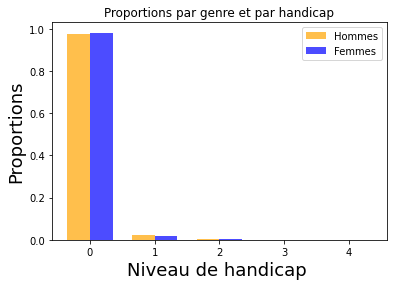

In [106]:
Homme_bars = plt.bar(index,h_handi_prop, 0.35, alpha=0.7, color='orange', label='Hommes')
Femme_bars = plt.bar(index+0.35, f_handi_prop, 0.35, alpha=0.7, color ='blue', label='Femmes' )


# title and labels

plt.xlabel('Niveau de handicap ', fontsize=18)
plt.ylabel('Proportions', fontsize=18)
plt.title('Proportions par genre et par handicap');
locations = index + 0.35/2
labels = [0, 1, 2, 3, 4]
plt.xticks(locations, labels)
plt.legend();

In [107]:
df1[['présent', 'age']].describe()

,présent,age
count,110526.000000,110526.000000
mean,0.798066,37.089219
std,0.401445,23.110026
min,0.000000,0.000000
25%,1.000000,18.000000
50%,1.000000,37.000000
75%,1.000000,55.000000
max,1.000000,115.000000


In [133]:
# Intervalles de découpage des ages
decoup_age = [-1, 2, 12, 19, 39, 59, 115 ]

# labels des tranches d'âges
tranches = ['nourrissons', 'enfants', 'ados', 'jeunes', 'adultes', 'plus âgés']

# Création du dataframe
df1['age_group'] = pd.cut(df1['age'], decoup_age, labels=tranches)


# Vérifier si tous les échantillons sont inclus - La valeur vraie (True) est attendu.
df1.shape[0] == df1.query('age_group == "nourrissons"').age.count() + df1.query('age_group == "enfants"').age.count() + df1.query('age_group == "ados"').age.count()+ df1.query('age_group == "jeunes"').age.count()+ df1.query('age_group == "adultes"').age.count() + df1.query('age_group == "plus âgés"').age.count()

True

In [115]:
# Obtenir la proportion de présence pour chaque groupe d'âges
moy_par_groupe = df1.groupby('age_group')['présent'].mean()
moy_par_groupe

age_group
nourrissons    0.824226
enfants        0.779436
ados           0.740373
jeunes         0.768618
adultes        0.811918
plus âgés      0.846880
Name: présent, dtype: float64

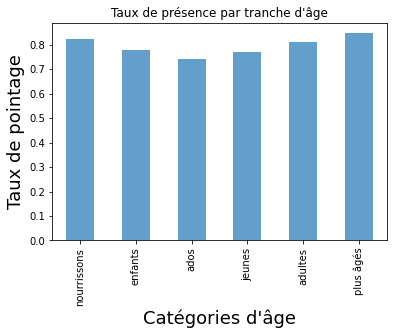

In [116]:
# Vue graphique

moy_par_groupe.plot(kind='bar', alpha=.7);

# title and labels
plt.xticks([0, 1, 2, 3, 4, 5] , tranches)
plt.title("Taux de présence par tranche d'âge");
plt.ylabel('Taux de pointage', fontsize=18)
plt.xlabel("Catégories d'âge", fontsize=18);

*On peut observer clairement que les **plus âgés**, les **nourrissons** et les **enfants** sont les assidus aux RV.* 😬 *Ce qui peut facilement s'expliquer, une réalité même dans nos sociétés africaines à majorité jeune*.

*Allons plus loin dans l'analyse avec les pourcentages pour mieux voir cette différence.*

In [117]:
df1.age_group.value_counts()

adultes        30072
jeunes         28870
plus âgés      21173
enfants        13606
ados            9375
nourrissons     7430
Name: age_group, dtype: int64

In [118]:
total=0
for tranche in tranches :
    print('------------------------------------------------------------')
    print("Le pourcentage de présence des {}s est de : {:.2f} %".format(tranche , df1.age_group.value_counts()[tranche]/df1.shape[0]*100))
    total= total + df1.age_group.value_counts()[tranche]/df1.shape[0]*100
print('============================================================')
print('Le Total fait naturellement : {} %'.format(total))

------------------------------------------------------------
Le pourcentage de présence des nourrissonss est de : 6.72 %
------------------------------------------------------------
Le pourcentage de présence des enfantss est de : 12.31 %
------------------------------------------------------------
Le pourcentage de présence des adoss est de : 8.48 %
------------------------------------------------------------
Le pourcentage de présence des jeuness est de : 26.12 %
------------------------------------------------------------
Le pourcentage de présence des adultess est de : 27.21 %
------------------------------------------------------------
Le pourcentage de présence des plus âgéss est de : 19.16 %
Le Total fait naturellement : 100.0 %


In [119]:
 df1.age_group.value_counts()['jeunes']/df1.shape[0]

0.2612055082062139

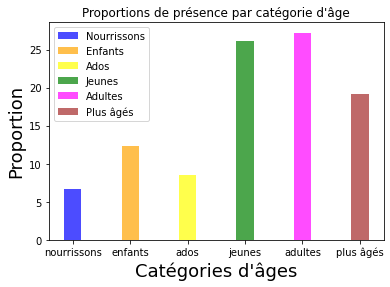

In [120]:
# Vue graphique
couleurs = ['blue','orange','yellow','green','magenta','brown']
for tranche,couleur in zip(tranches,couleurs) :
    plt.bar(tranches.index(tranche), df1.age_group.value_counts()[tranche]/df1.shape[0]*100, width=.3, alpha=0.7, color =couleur, label=tranche.capitalize())
    #plt.bar(1, children_prop, width=.3, alpha=0.7, color='orange', label='Children')
    

# titre et labels
plt.xticks([0, 1, 2, 3, 4, 5], tranches)
plt.xlabel("Catégories d'âges", fontsize=18)
plt.ylabel('Proportion', fontsize=18)
plt.title("Proportions de présence par catégorie d'âge");
plt.legend();

#### QR 8 :  Étudions à présent la proportion de sms reçus !?

In [121]:
df1.sms_reçu.value_counts()

0    75044
1    35482
Name: sms_reçu, dtype: int64

In [122]:
print('La porportion de sms reçus est de : {:.2f} %'.format(df1.sms_reçu.value_counts()[1]/df1.shape[0]*100))

La porportion de sms reçus est de : 32.10 %


In [123]:
print('La porportion de sms non reçus est de : {:.2f} %'.format(df1.sms_reçu.value_counts()[0]/df1.shape[0]*100))

La porportion de sms non reçus est de : 67.90 %


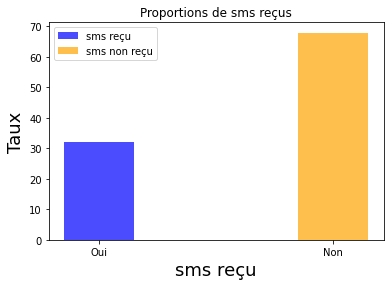

In [124]:
plt.bar(0, df1.sms_reçu.value_counts()[1]/df1.shape[0]*100, width=.3, alpha=0.7, color ='blue', label='sms reçu' )
plt.bar(1, df1.sms_reçu.value_counts()[0]/df1.shape[0]*100, width=.3, alpha=0.7, color='orange', label='sms non reçu')

# titre et labels
plt.xticks([0, 1], ['Oui', 'Non'])
plt.xlabel('sms reçu', fontsize=18)
plt.ylabel('Taux', fontsize=18)
plt.title('Proportions de sms reçus');
plt.legend();

*Donc seulement **32.10 %** des patients reçoivent des sms. Intrigant !* 🤔

sms_reçu
0    0.832965
1    0.724255
Name: présent, dtype: float64
----------------------------------------


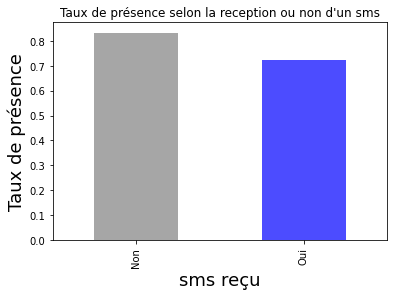

In [125]:
print(df1.groupby('sms_reçu')['présent'].mean())
print('----------------------------------------')
df1.groupby('sms_reçu')['présent'].mean().plot(kind='bar', alpha=.7, color=['grey', 'blue']);
plt.xticks([0, 1], ['Non', 'Oui'])
plt.title("Taux de présence selon la reception ou non d'un sms");
plt.xlabel('sms reçu', fontsize=18)
plt.ylabel('Taux de présence', fontsize=18);

Une différence visibble entre les présents et les absents. Car **72.42 %** de ceux qui ont reçu des sms sont présents contre **83.29 %** de ceux qui n'ont pas reçus de sms. Soit une différence d'à peu près **10.87 %**, ce qui assez considérable pour une population de **110.527** patients. Autrement environ **1.144 patients seraient venus même s'ils n'ont pas reçu de sms. La reception de sms n'est pas determinant ou n'est pas la bonne technique pour attirer les patients.**.

#### QR 9 : Quelles sont les proportions et le tarif des spectacles par heure, jour, mois et année ?

7     0.173832
8     0.138863
9     0.116018
10    0.100031
14    0.082578
13    0.081755
11    0.076561
15    0.073096
16    0.050142
12    0.049056
17    0.026320
6     0.014277
18    0.012124
19    0.004415
20    0.000905
21    0.000027
Name: heure_prévue, dtype: float64


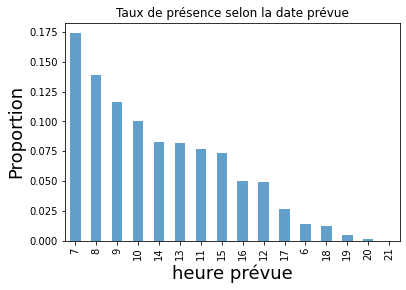

In [126]:
print(df1.heure_prévue.value_counts(normalize=True))
df1.heure_prévue.value_counts(normalize=True).plot(kind='bar', alpha=.7)

# titre et labels
plt.title('Taux de présence selon la date prévue');
plt.xlabel('heure prévue', fontsize=18)
plt.ylabel('Proportion', fontsize=18);

*On remarque plus de rendez-vous prévuS en début de journée qu'en fin de journée, donc plus les heures passent moins il y a de rendez-vous prévus.*

*Traduisons cela en terme de présence !*

heure_prévue
6     0.807985
7     0.848488
8     0.817305
9     0.803010
10    0.779305
11    0.772158
12    0.796385
13    0.790726
14    0.773200
15    0.768164
16    0.762360
17    0.751805
18    0.787313
19    0.766393
20    0.700000
21    0.666667
Name: présent, dtype: float64


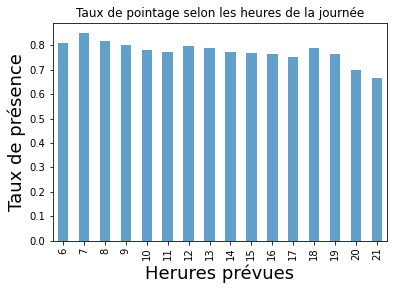

In [127]:
# En terme de pourcentage
print(df1.groupby('heure_prévue')['présent'].mean())
df1.groupby('heure_prévue')['présent'].mean().plot(kind='bar', alpha=.7);

# title and labels

plt.title('Taux de pointage selon les heures de la journée');
plt.xlabel('Herures prévues', fontsize=18)
plt.ylabel('Taux de présence', fontsize=18);

*On note qu'il y a plus de présence à **7h** et à **18h**. L'ensemble du graphique reste homogène. Les heures prévues semblent ne pas être determinantes pour prédire la présence ou non des patients*.

*Continuons avec les autres variables temporelles pour les dates prévus !* 

jour_prévue
Friday       0.794502
Monday       0.802417
Saturday     0.958333
Thursday     0.795275
Tuesday      0.797806
Wednesday    0.798904
Name: présent, dtype: float64


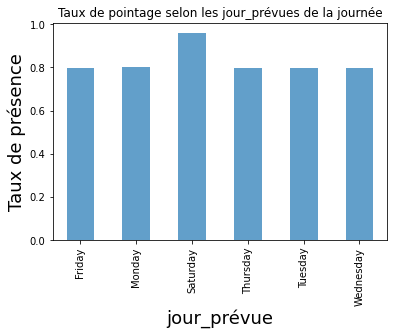

mois_prévue
1     0.700000
2     0.708185
3     0.669065
4     0.690240
5     0.825440
6     0.899193
11    1.000000
12    0.688525
Name: présent, dtype: float64


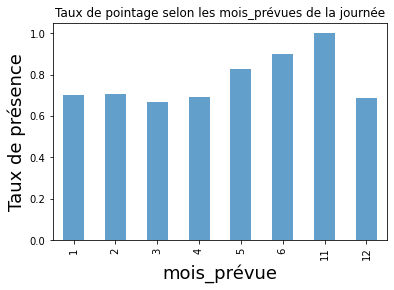

an_prévu
2015    0.693548
2016    0.798124
Name: présent, dtype: float64


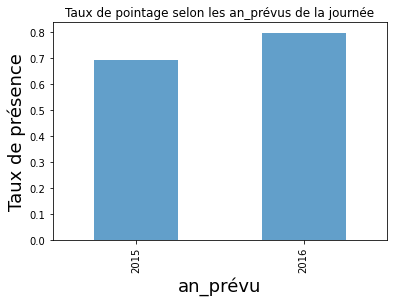

In [128]:
périodes = ['jour_prévue', 'mois_prévue', 'an_prévu']

for période in périodes :
    print(df1.groupby(période)['présent'].mean())
    df1.groupby(période)['présent'].mean().plot(kind='bar', alpha=.7);

    # title and labels

    plt.title('Taux de pointage selon les {}s de la journée'.format(période));
    plt.xlabel('{}'.format(période), fontsize=18)
    plt.ylabel('Taux de présence', fontsize=18);
    plt.show()

**Analyse globale des variables temporelles**: <br>
>* Pour les jours, les **Mercredi** sont les plus prisés , en raison peut être au temps libre accordé par le boulot ou l'école au niveau des patients ou des parents des patiens s'il s'agit des nourrissons et des enfants. <br>
*Pour les mois **les fins d'années** acceuillent plus de patients respectant les rv, sauf le mois de Décembre, probablement en raison des fêtes de fin d'années et leur préparatif 24,25...31 Déc.<br>
*Pour les années plus nous n'avons que deux ans, avec une évolution notoire d'à peu près de **10 %**. Ce qui nous permet de dire que **plus les années passents plus il y aura de patients présents aux RV**. Cela dû probablement aux campagnes de sensibilisations.

*Pour les dates où quelqu'un a appelé ou enregistré le rendez-vous, avant le rendez-vous bien sûr. On a :*

<bound method Series.sort_values of jour_rv
Friday       0.787739
Monday       0.793519
Saturday     0.769231
Thursday     0.806459
Tuesday      0.799064
Wednesday    0.803108
Name: présent, dtype: float64>


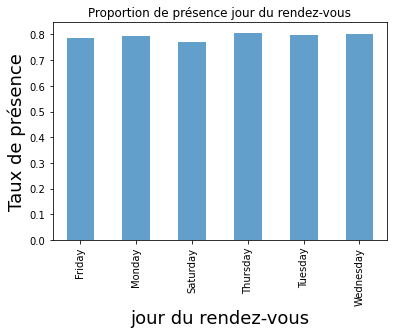

<bound method Series.sort_values of mois_rv
4    0.804328
5    0.792135
6    0.815425
Name: présent, dtype: float64>


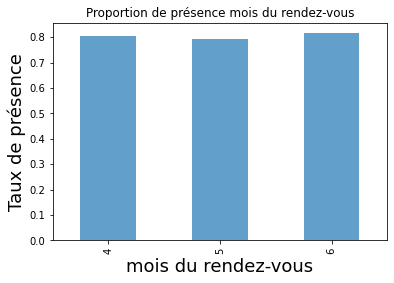

<bound method Series.sort_values of an_rv
2016    0.798066
Name: présent, dtype: float64>


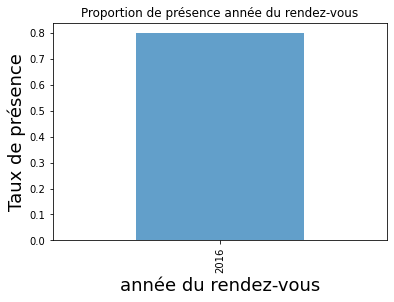

In [129]:
périodes = {'jour_rv':'jour du rendez-vous', 'mois_rv':'mois du rendez-vous', 'an_rv':'année du rendez-vous'}

for période in périodes.keys() :
    
    print(df1.groupby(période)['présent'].mean().sort_values)
    df1.groupby(période)['présent'].mean().plot(kind='bar', alpha=.7);

    # title and labels

    plt.title('Proportion de présence {}'.format(périodes[période]));
    plt.xlabel(périodes[période], fontsize=18)
    plt.ylabel('Taux de présence', fontsize=18);
    plt.show()

*Apparemment les graphiques parlent d'eux même!*

#### QR 10 : Qu'en est -il maintenant des quartiers ? Y'a t'il des disparités sur leur taux de présence ou d'absence aux RV ?

In [130]:
print("Nous avons au total {} quartiers recensés.".format(df1['quartier'].nunique()))
print('------------------------------------------')

df1.groupby('quartier')['présent'].mean().sort_values(ascending=False)

Nous avons au total 81 quartiers recensés.
------------------------------------------


quartier
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MÁRIO CYPRESTE                 0.854447
SOLON BORGES                   0.852878
                                 ...   
ITARARÉ                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE    0.000000
Name: présent, Length: 81, dtype: float64

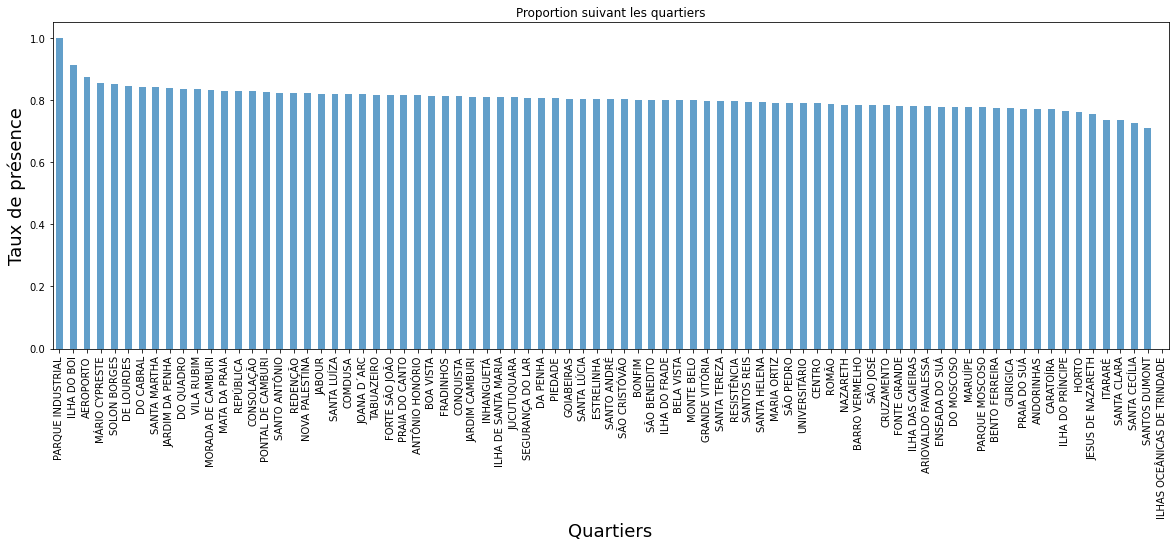

In [131]:
# Vue graphique
plt.figure(figsize = (20,6));
df1.groupby('quartier')['présent'].mean().sort_values(ascending=False).plot(kind='bar', alpha=.7);

# title and labels

plt.ylabel('Taux de présence', fontsize=18)
plt.xlabel('Quartiers', fontsize=18)
plt.title('Proportion suivant les quartiers');

*Apparement seul le quartier **PARQUE INDUSTRIAL** se voit toute sa population respecter les date de RV. Avec évidement un taux de participation de **100 %**.*

### <a id='conclusions'></a>
## Conclusions

> **Résultats**:
>* La majorité des patients à peu près 80 % (79.81 %) se présentent habituellement au rendez-vous prévu.<br>
>* Les femmes et les hommes ont à peu près les même habitudes.<br>
>* Les hommes sont plus atteints par l'alcoolisme par rapport aus femmes, presque le triple de ces dernières.<br>
>* L'hypertension  est la maladie la plus fréquente lors des rendez-vous- près de 20 % (19.72 %). <br> 
>* Cela est suivi du diabète avec peu près de 8 % (7.19 %) qui comme l'hypertension, touche plus les femmes que les hommes.<br>
>* Les patients qui ont un âge compris entre 40 et 60 ans sont les plus malades lors des RV.<br>
>* Les hommes se retrouvent avec un plus grand nombre de handicapés, (2.72 % contre 1.95 % chez les femmes).<br>
>* La réception de SMS semble ne pas être efficace car les non recepteurs de sms sont plus assidus aux RV. On trouve 1.144 patients qui seraient venus même s'ils ne reçoivent pas de sms.<br>
>* Dans les RV, 90 % des patients ne sont pas couverts par la bourse et en plus on note 80.19 % des non-boursiers sont présents contre 76.26 % de présence chez les boursiers. La bourse semble être un facteur d'absence même si on observe une forte participation des boursiers.<br>
>*Les débuts de journées sont les plus programmés, parmi les jours le Mercredi reçoit plus de visite etaussi les fins d'années sauf le mois de Décembre, dû peut-être aux préparatifs de fêtes de fin d'années.
>*Le quartier PARQUE INDUSTRIAL est le quartier avec le taux de présence le plus haut aux rendez-vous.


> **Limites**:<br>
>* L'ensemble de données ne contient pas suffisamment de données pour toute l'année - seuls trois mois sont disponibles.
>* L'ensemble de données contient certaines lignes avec les mois de planification 11 et 12 en 2015, alors que tous les rendez-vous sont en 2016.
>* Aucune information sur l'heure de rendez-vous qui est peu être importante pour étudier par rapport au tarif du service.
>* Si on pouvait avoir une troisième année à côté ça serait idéale pour voir plus clair sur l'évolution du taux d'absence ou de présence en fonction des années.<br>


Référence : [Mostafa Refaat](https://www.kaggle.com/mostafarefaatm)

![gif-minion.png](img/gif-minions.gif)

In [132]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

<center><h1><strong>Auteur</strong></h1></center>

![author.png](img/Rooni2.png)

*`Nom : `* **`DIATTA`**  <br>
*`Prénom  :`* **`Arona Ben Cherif`** <br>
*`Niveau : `* **`Master 2 | Statistiques et Informatique Décisionnelle (UADB)`**  <br>
*`Nom de classe : `* **`ARONA_ADND`** <br>
*`Promotion : `* **`Cohorte 2 ALX-Udacity`** <br>
*`Nom de classe : `* **`ARONA_ADND`** <br>
*`Programme : `* **`Nanodegree d'analyste de données`** <br>